# Books Recommendation System Project
### In this project we will be working with a Books data set, We will build a recommender system that suggest books to the user based on they previous rating on the other books. 

## This data set contains the following features:
>   
   -  id : The Book ID
   -  title : The Book Title
   - rating : The rating given to the book
   - user : The User ID
   

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Gathering Data

In [2]:
df1 = pd.read_csv(r'Books1.csv').drop('Unnamed: 0',axis=1)
df2 = pd.read_csv(r'Books2.csv')
df3 = pd.read_csv(r'Books3.csv')

In [3]:
df1.head()

,id,title,rating,user
0,29056083,Harry Potter and the Cursed Child: Parts One a...,0,0
1,11125,Digital Fortress,4,0
2,976,Deception Point,4,0
3,6411961,"The Lost Symbol (Robert Langdon, #3)",4,0
4,968,"The Da Vinci Code (Robert Langdon, #2)",4,0


In [4]:
df2.head()

,id,title,rating,user
0,9686929,Strength Of Materials: Mechanics Of Solids,0,747
1,1843479,Structural Analysis,0,747
2,2180122,"Solutions Manual to Accompany Crandall, Dahl a...",0,747
3,1497532,Atlas of Men: A guide for somatotyping the adu...,0,749
4,2110937,Vadim (Constantin Vadim #3),0,750


In [5]:
df3.head()

,id,title,rating,user
0,234225,"Dune (Dune Chronicles, #1)",0,3840
1,11507,My Name Is Asher Lev,5,3840
2,4069,Man's Search for Meaning,5,3840
3,7624,Lord of the Flies,4,3840
4,157993,The Little Prince,4,3840


In [6]:
df = pd.concat([df1,df2,df3])

In [7]:
df.head()

,id,title,rating,user
0,29056083,Harry Potter and the Cursed Child: Parts One a...,0,0
1,11125,Digital Fortress,4,0
2,976,Deception Point,4,0
3,6411961,"The Lost Symbol (Robert Langdon, #3)",4,0
4,968,"The Da Vinci Code (Robert Langdon, #2)",4,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47390 entries, 0 to 19564
Data columns (total 4 columns):
id        47390 non-null int64
title     47390 non-null object
rating    47390 non-null int64
user      47390 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


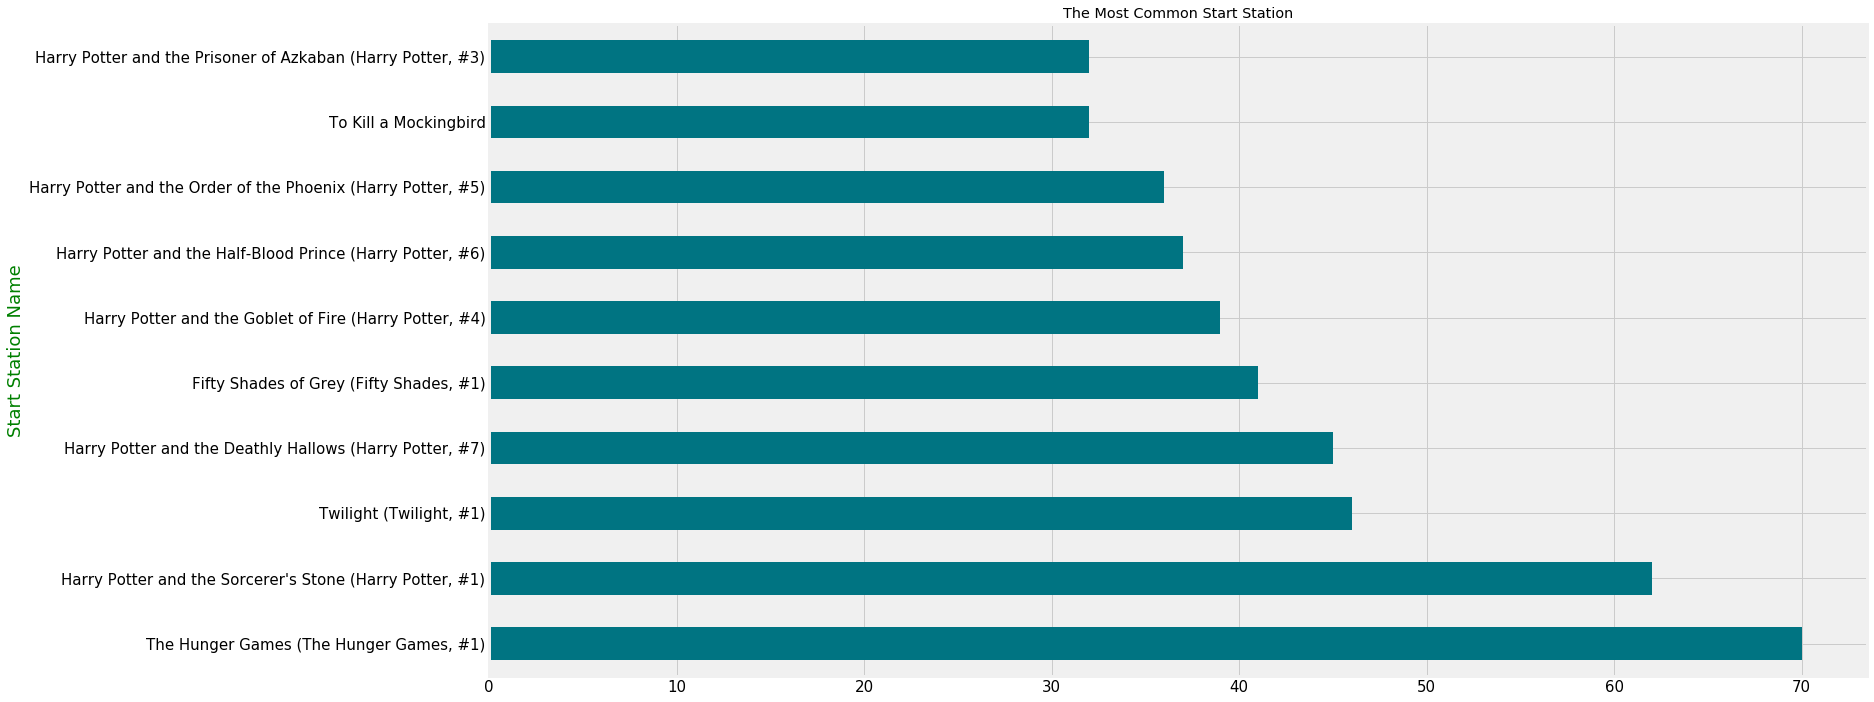

In [9]:
g = df[df['rating'] == 5]['title'].value_counts()[:10]

#initializing plot
ax = g.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Start Station')

#x-label
ax.set_ylabel('Start Station Name', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

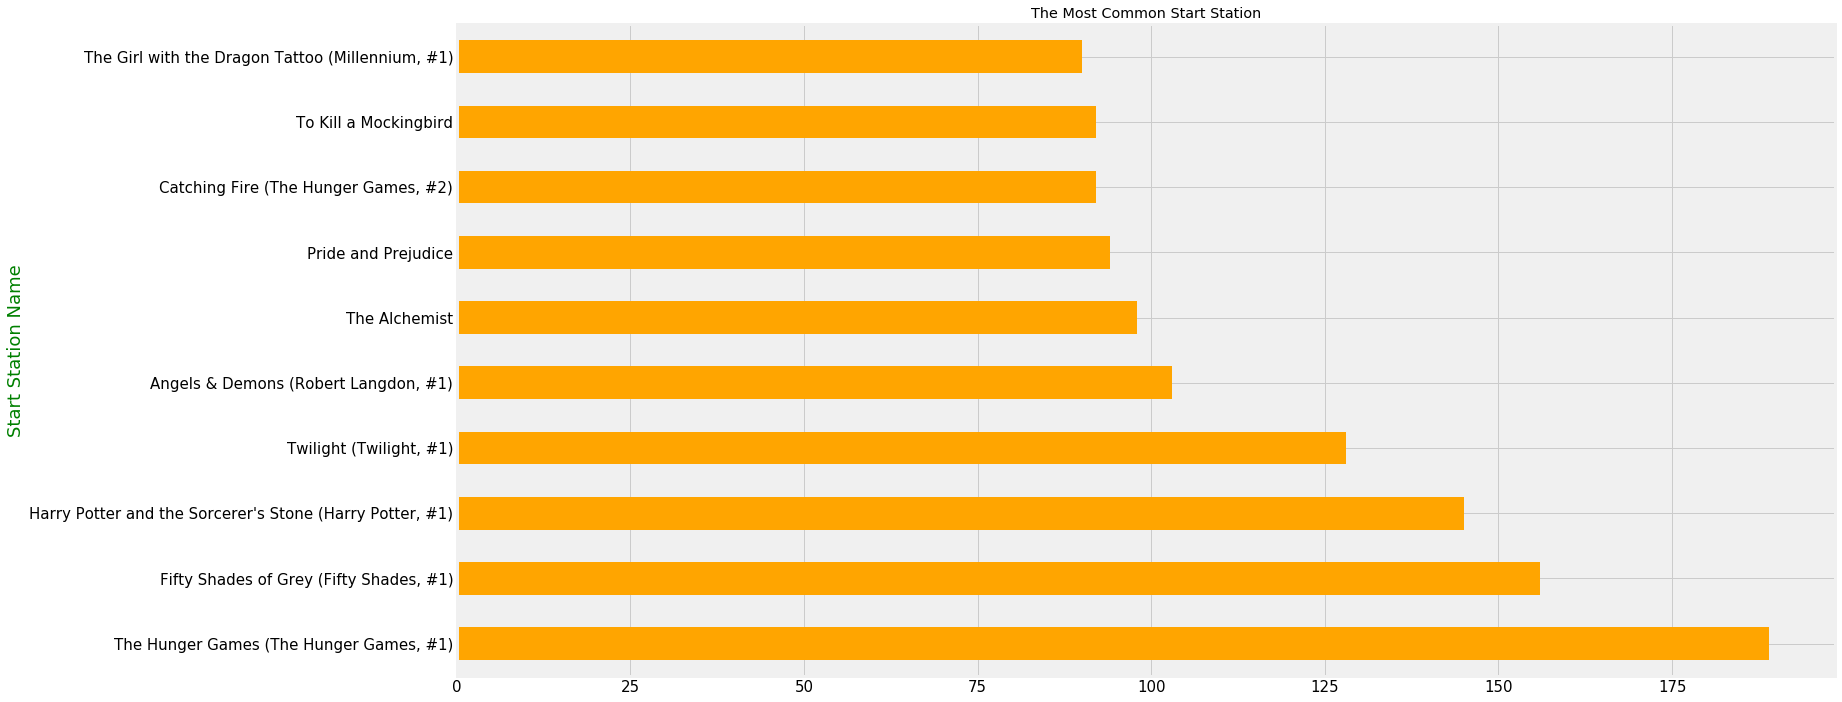

In [10]:
g = df.title.value_counts()[:10]

#initializing plot
ax = g.plot.barh(color = '#FFA500', fontsize = 15)

#giving a title
ax.set(title = 'The Most Common Start Station')

#x-label
ax.set_ylabel('Start Station Name', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(22, 12)

#shwoing the plot
plt.show()

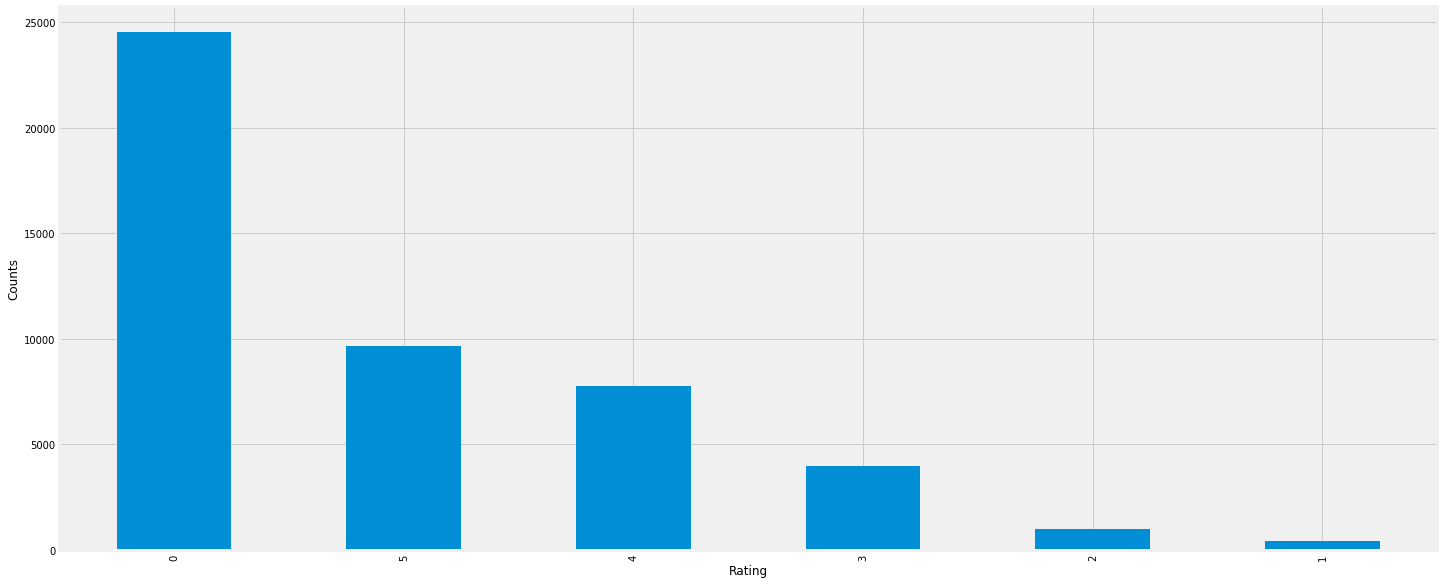

In [11]:
plt.figure(figsize=(22,10))
df['rating'].value_counts().plot('bar')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

In [12]:
user_1 = df['user'].value_counts().index[0]

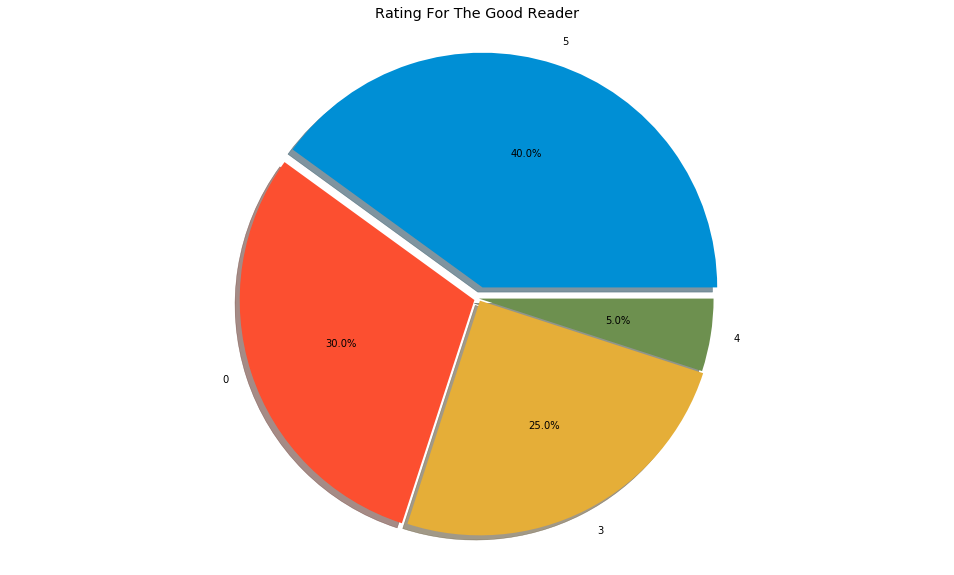

In [13]:
plt.figure(figsize=(15,10))
label=['5','0','3','4']
plt.pie(df[df['user'] == user_1]['rating'].value_counts(),explode=[0.05,0.02,0.01,0],labels=label,autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Rating For The Good Reader')
plt.show()

In [14]:
dff = df.groupby('title',as_index=False)['rating'].count()
dff = dff.rename(columns={'rating':'rating_count'})

In [15]:
df = pd.merge(df,dff,on='title')

In [16]:
df = df.query('rating_count >= 5').reset_index(drop=True)

In [17]:
df_item = df.drop_duplicates(['title','user']).pivot(index='title',columns='user',values='rating').fillna(0)

In [18]:
df_item

user,0,3,4,6,8,9,10,12,13,18,...,6735,6737,6738,6747,6750,6753,6770,6771,6773,6776
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1,000 Places to See Before You Die",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11/22/63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Q84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1Q84 (1Q84, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"1st to Die (Women's Murder Club, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 States: The Story of My Marriage,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from scipy.sparse import csr_matrix

In [20]:
df_sparse = csr_matrix(df_item)

In [21]:
from sklearn.neighbors import NearestNeighbors

In [22]:
knn = NearestNeighbors(metric='cosine',algorithm='brute')

In [23]:
knn.fit(df_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [24]:
query_index = np.random.choice(df_item.shape[0])
print(query_index)
distances, indices = knn.kneighbors(df_item.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

1053


In [25]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_item.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_item.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The One Minute Manager:

1: The Lean Startup: How Today's Entrepreneurs Use Continuous Innovation to Create Radically Successful Businesses, with distance of 0.6875466136460227:
2: Alice's Adventures in Wonderland & Through the Looking-Glass, with distance of 0.7126521144336546:
3: The Prince, with distance of 0.7190242565254918:
4: What the Dog Saw and Other Adventures, with distance of 0.7817179374673003:
5: The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change, with distance of 0.7889982485133482:


In [50]:
def book_matching(book_name):
    distances, indices = knn.kneighbors(df_item.loc[book_name,:].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(book_name))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, df_item.index[indices.flatten()[i]], distances.flatten()[i]))
    plt.figure(figsize=(15,10))
    label= df_item.index[indices.flatten()[1:]]
    plt.pie((1 - distances.flatten()[1:])*100,labels=label,autopct='%.1f%%',shadow=True)
    plt.axis('equal')
    plt.title('The Best Matching Books')
    plt.show()
    

Recommendations for Harry Potter and the Sorcerer's Stone (Harry Potter, #1):

1: Harry Potter and the Prisoner of Azkaban (Harry Potter, #3), with distance of 0.5551509218526218:
2: Harry Potter and the Goblet of Fire (Harry Potter, #4), with distance of 0.5838587257814557:
3: Harry Potter and the Deathly Hallows (Harry Potter, #7), with distance of 0.5880328590389384:
4: Harry Potter and the Half-Blood Prince (Harry Potter, #6), with distance of 0.60828310999958:
5: Harry Potter and the Chamber of Secrets (Harry Potter, #2), with distance of 0.6162307236031911:


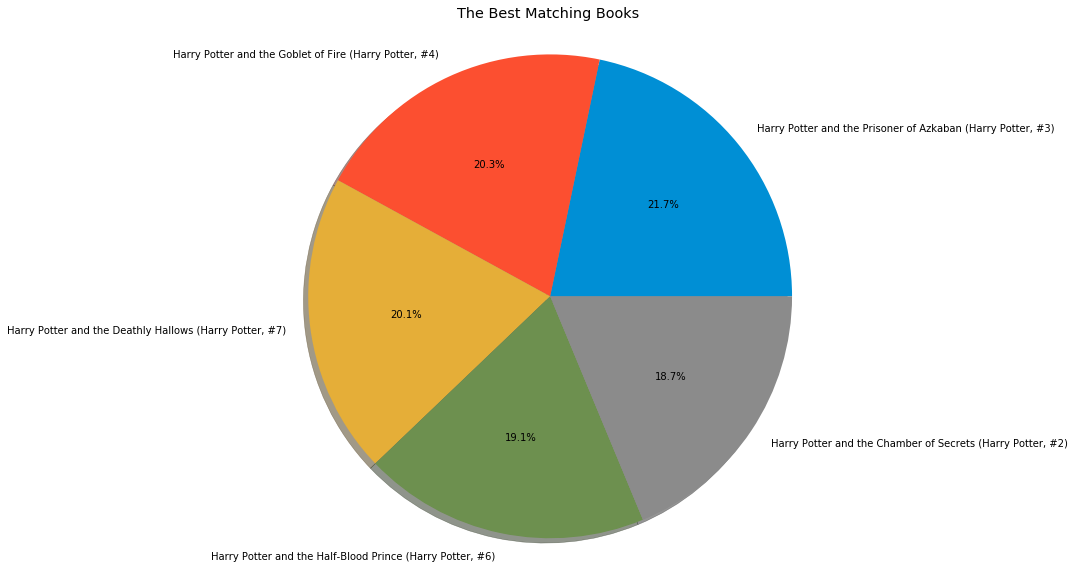

In [55]:
book_matching("Harry Potter and the Sorcerer's Stone (Harry Potter, #1)")